# TP3 -Tree based methods

# AZIZ ALAOUI Saâd - IDRISSI Karim - KOUTIT ABDELLAH

In [4]:
%matplotlib inline
from pylab import *
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

##   Importation des données Spam

> Télécharger [les donnnées Spam](https://archive.ics.uci.edu/ml/datasets/spambase) depuis la plateforme UCI. Importer les données sous python, par exemple en utilisant pandas. Donner son label à chaque variable. La variable cible $Y$ qui indique la présence d'un spam est en dernière position dans la base de données. Créer deux tableaux numpy X_Spam and Y_Spam pour ce problème de classification.

#### Importation du nom des variables depuis "spambase.names"

Le fichier des noms de variables (prêt à l'emploi, pour vous faire gagner du temps) est disponible [ici](https://box.ec-nantes.fr:443/index.php/s/5SZxSp5ZSFEeGZR).

In [7]:
file_path=  "spambase/"
data_path = file_path + "spambase.names"

features_names = pd.read_csv(data_path,delim_whitespace=True,skiprows=33,header=None)
print(features_names.values[:,0])

['word_freq_make:' 'word_freq_address:' 'word_freq_all:' 'word_freq_3d:'
 'word_freq_our:' 'word_freq_over:' 'word_freq_remove:'
 'word_freq_internet:' 'word_freq_order:' 'word_freq_mail:'
 'word_freq_receive:' 'word_freq_will:' 'word_freq_people:'
 'word_freq_report:' 'word_freq_addresses:' 'word_freq_free:'
 'word_freq_business:' 'word_freq_email:' 'word_freq_you:'
 'word_freq_credit:' 'word_freq_your:' 'word_freq_font:' 'word_freq_000:'
 'word_freq_money:' 'word_freq_hp:' 'word_freq_hpl:' 'word_freq_george:'
 'word_freq_650:' 'word_freq_lab:' 'word_freq_labs:' 'word_freq_telnet:'
 'word_freq_857:' 'word_freq_data:' 'word_freq_415:' 'word_freq_85:'
 'word_freq_technology:' 'word_freq_1999:' 'word_freq_parts:'
 'word_freq_pm:' 'word_freq_direct:' 'word_freq_cs:' 'word_freq_meeting:'
 'word_freq_original:' 'word_freq_project:' 'word_freq_re:'
 'word_freq_edu:' 'word_freq_table:' 'word_freq_conference:'
 'char_freq_;:' 'char_freq_(:' 'char_freq_[:' 'char_freq_!:'
 'char_freq_$:' 'char_f

In [8]:
features_names.head()

,0,1
0,word_freq_make:,continuous.
1,word_freq_address:,continuous.
2,word_freq_all:,continuous.
3,word_freq_3d:,continuous.
4,word_freq_our:,continuous.


#### Importation de la table de données au format pandas

In [9]:
data_path = file_path + "spambase.data"
Spam_data = pd.read_csv(data_path,header=None,sep=',')

In [10]:
Spam_data

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [11]:
print(Spam_data.shape)
print(Spam_data.head())

(4601, 58)
     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


In [12]:
Spam_data.describe()  # le summary de pandas

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [13]:
X_Spam = Spam_data.values[:,0:57]
Y_Spam = Spam_data.values[:,57]

Y_Spam

array([1., 1., 1., ..., 0., 0., 0.])

## Arbres décisionnels CART 

> Ajuster un arbre de classification sur les données Spam avec la fonction [tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/tree.html#classification) (lire la documentation de cette fonction).

In [14]:
from sklearn import tree
arbre_dec = tree.DecisionTreeClassifier()
arbre_dec = arbre_dec.fit(X_Spam,Y_Spam)

> Représenter l'arbre de classification avec 5 noeuds terminaux (`max_leaf_nodes`)  à l'aide de la fonction `tree.plot_tree`.

[Text(0.5555555555555556, 0.875, 'X[52] <= 0.056\ngini = 0.478\nsamples = 4601\nvalue = [2788, 1813]'),
 Text(0.3333333333333333, 0.625, 'X[6] <= 0.055\ngini = 0.36\nsamples = 3471\nvalue = [2655, 816]'),
 Text(0.2222222222222222, 0.375, 'X[51] <= 0.378\ngini = 0.275\nsamples = 3141\nvalue = [2625, 516]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.181\nsamples = 2737\nvalue = [2462, 275]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.481\nsamples = 404\nvalue = [163, 241]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.165\nsamples = 330\nvalue = [30, 300]'),
 Text(0.7777777777777778, 0.625, 'X[24] <= 0.4\ngini = 0.208\nsamples = 1130\nvalue = [133, 997]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.123\nsamples = 1060\nvalue = [70, 990]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.18\nsamples = 70\nvalue = [63, 7]')]

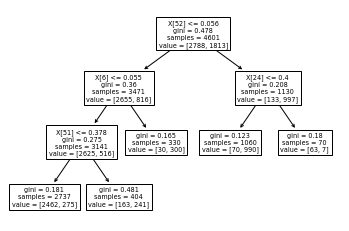

In [31]:
arbre_dec_5 = tree.DecisionTreeClassifier(max_leaf_nodes=5)
tree.plot_tree(arbre_dec_5.fit(X_Spam,Y_Spam))

> Comparer les performances de l'arbre de classification pour plusieurs choix de nombre maximal de noeuds (`max_leaf_nodes=`). Utiliser une procédure 5-folds avec la fonction `GridSearchCV` pour évaluer  et comparer les erreurs de généralisation. Pensez à imposer une permutation aléatoire des blocs.

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
maxnodes ={'max_leaf_nodes' : [0,15,20,30,50,100,200,300,400,500,800]}

kfold_5_shuffle = KFold(n_splits=5, shuffle=True, random_state=0)
nodesGrid = GridSearchCV(tree.DecisionTreeClassifier(),
                      maxnodes,
                      n_jobs=4,
                        cv=kfold_5_shuffle)
nodesGrid.fit(X_Spam, Y_Spam)
print(nodesGrid.best_params_)

C:\Users\abdou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 55.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\abdou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abdou\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\abdou\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 314, in fit
    raise ValueError(
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  warnings.warn(

{'max_leaf_nodes': 100}


> Si on appelle `Cart_grid` le résultat de `GridSearchCV`, le détail des scores obtenus sur la grille de paramètres pour chacun des folds est disponible dans le dictionnaire `Cart_grid.cv_results_`.    
> - Afficher l'ensemble des attributs de `Cart_grid.cv_results_`.    
> - Extraire du résultat de gridsearchCV le vecteur des scores moyens obtenus par la procédure 5 folds pour chaque paramètre choisi (attribut `mean_test_score`).  
> - Representer le score (moyen) en fonction du nombre de noeuds terminaux. 

{'mean_fit_time': array([0.01557341, 0.06562023, 0.06061234, 0.08087273, 0.09139981,
       0.09686847, 0.11561632, 0.12499194, 0.12499609, 0.14668522,
       0.12499199]), 'std_fit_time': array([0.00877785, 0.01169166, 0.00896654, 0.0159216 , 0.00767652,
       0.01169124, 0.01249862, 0.01397345, 0.01397911, 0.02490582,
       0.01711598]), 'mean_score_time': array([0.        , 0.        , 0.00624962, 0.00079985, 0.00312481,
       0.003125  , 0.        , 0.00312433, 0.00020013, 0.00352511,
       0.        ]), 'std_score_time': array([0.        , 0.        , 0.00765419, 0.00074832, 0.00624962,
       0.00625   , 0.        , 0.00624866, 0.00040026, 0.00609946,
       0.        ]), 'param_max_leaf_nodes': masked_array(data=[0, 15, 20, 30, 50, 100, 200, 300, 400, 500, 800],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_leaf_nodes': 0}, {'max_leaf_nodes

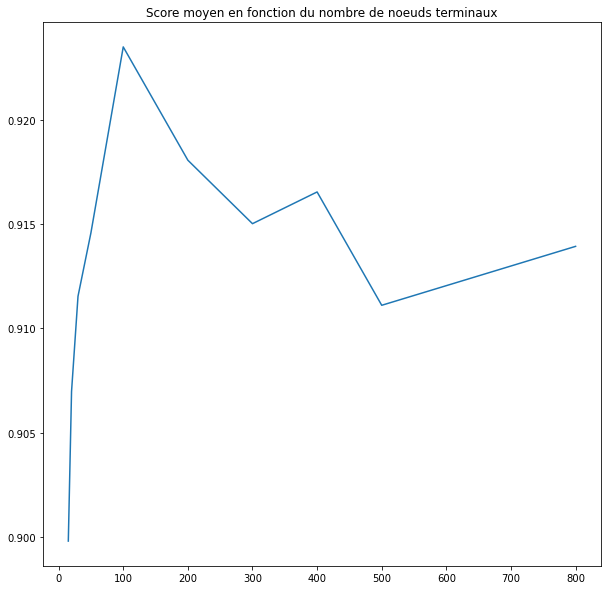

In [17]:
print(nodesGrid.cv_results_)
mean_nodes_score=nodesGrid.cv_results_['mean_test_score']
# print(mean_nodes_score)
plt.figure(figsize=(10,10))
plt.plot(maxnodes['max_leaf_nodes'],mean_nodes_score)
plt.title("Score moyen en fonction du nombre de noeuds terminaux")
plt.show()

Les performances sont très bonnes car le problème est assez facile mais on observe quand même l'effet du sur-apprentissage pour les arbres les plus developpés. 

> Illustrer l'instabilité des arbres CART sur des arbres de petites tailles (prendre par exemple `max_leaf_nodes=6`). On pourra tirer des échantillons aléatoirement avec remise dans les données initiales (précédure bootstrap) en utilisant la fonction [`resample`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html) et comparer finalement (graphiquement) les arbres de décision ainsi ajustés.

> **Bonus :** Cette fois pour des arbres à 20 noeuds terminiaux, et pour 10 échantillons bootstrap, extraire de la structure des arbres CART la liste des variables de découpage (voir par exemple [ici](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html)). Comparer ces listes de variables de découpage.

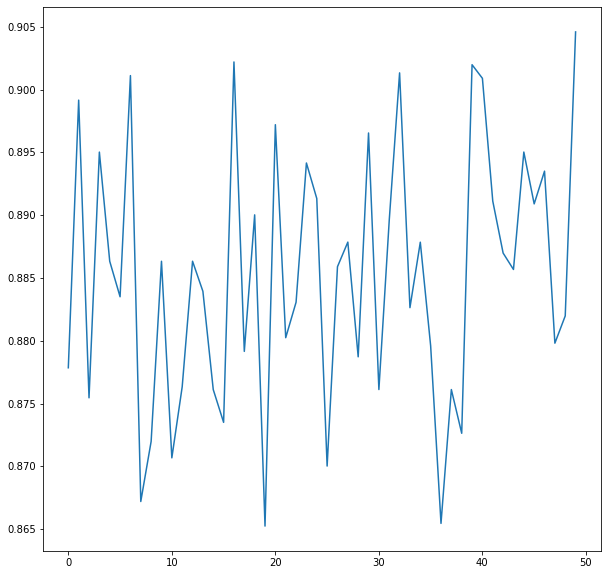

In [18]:
### TODO ###


X,Y=[],[]
kfold_5_shuffle = KFold(n_splits=5, shuffle=True, random_state=0)

for i in range(50):
    
    nodes=[6]
    parameters = {'max_leaf_nodes':nodes}
    Cart_grid = GridSearchCV(tree.DecisionTreeClassifier(), parameters,cv=kfold_5_shuffle)
    X_Spam_sampled, Y_Spam_sampled =resample(X_Spam, Y_Spam)
    Cart_grid.fit(X_Spam_sampled, Y_Spam_sampled)
    #print(Cart_grid.cv_results_)
    #print(Cart_grid.cv_results_.get("mean_test_score"))
    Y.append(Cart_grid.cv_results_.get("mean_test_score"))
    X.append(i)
    
plt.figure(figsize=(10,10))
plt.plot(X,Y)



# from sklearn.utils import resample
# kfold_5_shuffle = KFold(n_splits=5, shuffle=True, random_state=0)
# nodes = [6]
# parameters = {'max_leaf_nodes':nodes}
# Cart_grid = GridSearchCV(tree.DecisionTreeClassifier(), parameters,cv=kfold_5_shuffle)


## Bagged Trees

On importe maintenant les données Boston depuis `sckit-learn` (voir description plus bas) :

In [19]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
boston = load_boston()

C:\Users\abdou\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [20]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [21]:
X_Bost = boston.data
Y_Bost = boston.target
print(shape(X_Bost))

(506, 13)


> Séparer les données en deux échantillons apprentissage et test (80% - 20%).

In [22]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
data_train, data_test,target_train, target_test = train_test_split(X_Bost,Y_Bost,train_size=0.8)

In [23]:
X_Bost = boston.data
Y_Bost = boston.target
print(shape(X_Bost))

(506, 13)


> Construire (sans utiliser `BaggingRegressor()`) un bagged tree avec 20 échantillons bootstrap et donner la prédiction sur l'échantillon test. On pourra utiliser la fonction [`resample`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html).

In [24]:
from sklearn.utils import resample
bagged_tree=[]
for i in range(20):
    bagged_tree.append(resample(data_train,target_train,replace=True))
predictions=np.zeros(len(data_test))
for i in range(20):
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(bagged_tree[i][0],bagged_tree[i][1])
    predictions+=clf.predict(data_test)
predictions/=20
print(predictions)

[21.535 34.63  37.56  13.28  23.295 21.37  30.37  45.49  13.59  14.915
 14.14  14.54  25.815 19.905 20.49  19.58  20.86  42.115 21.395 18.81
  8.155 26.48  23.305 33.31  23.55  26.97  49.245 19.055 21.945 22.195
 17.94  21.89  23.625 32.255 20.56  29.245 18.66  11.17  20.435 11.845
 20.15  29.875 31.43  24.48  19.945 24.505 20.04  20.1   22.275 33.09
 18.035 29.905 14.75  10.29  26.83  14.85  43.39  20.41  23.155 15.225
 24.53  26.47  13.85  20.64  19.4   28.57  23.545 19.355 33.16  20.47
 32.065 19.93  12.565 16.455 34.39  47.785 20.61  21.1   24.12  12.57
 20.585 15.19  19.33  18.32  20.4   40.125 14.47  11.76  15.575 32.475
 41.95  18.98  11.625 19.75  20.525 30.59  24.345 13.02  11.28  15.95
 15.6   34.02 ]


Avec sckit-learn, les performances en régression sont évaluées par défaut via le score du $R^2$ (coefficient d'ajustement ou coefficient de détermination). Ce score donne une mesure de la qualité de la prédiction :

$$
R^{2}=1- \frac {\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}}{\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}} = 1- \frac { \frac 1n \sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}}{ var (Y)}. 
$$
Un ajustement parfait correspond évidemment à $R^2 = 1$. 

On reconnait un terme d'erreur quadratique au numérateur. On peut bien sûr calculer le score sur l'échantillon d'apprentissage ou sur l'échantillon test.

> Calculer ce score pour la prédiction précédente.

In [25]:
from sklearn.metrics import r2_score
r2_score(target_test,predictions)

0.8822628077928238

> Construire de même un bagged tree en utilsant cette fois directement la fonction `BaggingRegressor()` (voir [ici](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)), avec 20 arbres. Calculer la prédiction sur l'échantillon test et le score associé. 

In [26]:
from sklearn.ensemble import BaggingRegressor
bagTree = BaggingRegressor(base_estimator=tree.DecisionTreeRegressor(),
                         n_estimators=20, random_state=0).fit(data_train,target_train)
predictions_bagged=bagTree.predict(data_test)
print(predictions_bagged)
r2_score(target_test,predictions_bagged)

[20.505 34.57  36.87  14.5   25.37  21.89  27.38  45.71  13.425 16.425
 15.42  15.79  25.815 20.05  20.57  19.555 21.545 39.755 21.34  18.95
  9.34  24.78  24.445 34.085 23.655 27.45  47.705 18.9   22.31  21.59
 18.935 20.965 20.785 32.09  20.385 25.89  19.16  10.24  20.965 10.6
 19.37  29.65  31.515 24.645 19.185 23.295 20.51  21.16  22.125 33.695
 19.045 29.11  14.955  9.955 27.16  14.825 43.68  20.155 21.98  15.67
 24.58  23.14  14.445 20.61  19.33  28.335 23.355 18.02  33.415 19.485
 30.59  19.99  14.32  15.685 34.79  47.875 20.05  21.44  24.335 13.675
 21.47  15.35  20.305 18.6   19.68  40.43  14.335 13.2   16.07  34.7
 43.28  18.97  12.495 19.485 20.57  31.235 25.75  13.275 11.12  16.47
 15.22  33.845]


0.8830772882006819

On peut retrouver les arbres qui forment ce bagged tree:

In [27]:
print(bagTree.estimators_)

[DecisionTreeRegressor(random_state=2087557356), DecisionTreeRegressor(random_state=132990059), DecisionTreeRegressor(random_state=1109697837), DecisionTreeRegressor(random_state=123230084), DecisionTreeRegressor(random_state=633163265), DecisionTreeRegressor(random_state=998640145), DecisionTreeRegressor(random_state=1452413565), DecisionTreeRegressor(random_state=2006313316), DecisionTreeRegressor(random_state=45050103), DecisionTreeRegressor(random_state=395371042), DecisionTreeRegressor(random_state=1587149235), DecisionTreeRegressor(random_state=191269509), DecisionTreeRegressor(random_state=237186348), DecisionTreeRegressor(random_state=1668685308), DecisionTreeRegressor(random_state=620267411), DecisionTreeRegressor(random_state=439259671), DecisionTreeRegressor(random_state=2140390242), DecisionTreeRegressor(random_state=963653404), DecisionTreeRegressor(random_state=1309320516), DecisionTreeRegressor(random_state=2137312669)]


> Vérifier qu'il est possible d'accéder à tous les arbres du BaggingRegressor, par exemple donner la prédiction du deuxième arbre sur les données de test. 

In [28]:
tree2=bagTree.estimators_[1]
pred_tree2=tree2.predict(data_test)
print(pred_tree2)
r2_score(target_test,pred_tree2)

[18.9 34.9 36.5 13.4 25.  22.2 31.1 50.  14.2 19.1 19.1 17.8 22.8 19.4
 19.8 20.8 19.5 21.9 20.2 18.3 10.8 25.  29.6 36.4 27.  28.  50.  19.6
 19.7 22.3 15.6 22.2 11.9 31.1 21.1 20.3 17.3  8.5 21.5  8.5 18.9 29.4
 31.6 22.6 18.5 24.5 18.5 20.2 22.2 35.1 17.8 37.2 17.1  6.3 29.4 13.4
 42.8 19.5 20.9 13.4 25.  18.3 13.4 21.7 18.7 23.9 28.1 21.7 32.  20.2
 28.  21.2 13.4 13.1 37.2 50.  18.7 21.2 23.3  7.  23.1 12.8 17.1 16.1
 11.9 23.7 14.2 13.9 17.8 35.4 37.6 21.2 14.2 19.5 20.2 36.4 22.9 13.8
  8.7 12.7 13.9 37.2]


0.6322606557672563

> Il est bien sûr possible de faire du bagging avec d'autres prédicteurs que les arbres. Consulter la documentation de la fonction `BaggingRegressor()` pour ajuster sur les données un bagging de 20 regresseurs linéaires.

In [29]:
from sklearn import linear_model
bagTree = BaggingRegressor(base_estimator=linear_model.LinearRegression(),
                         n_estimators=20, random_state=0).fit(data_train,target_train)
predictions_bagged=bagTree.predict(data_test)
print(predictions_bagged)
r2_score(target_test,predictions_bagged)

[21.18985801 31.04422584 36.06986515 16.76448899 24.51908279 21.43786919
 22.82449149 36.89594263 13.70702603 18.66374174 15.13267002  8.97002862
 29.34332169 22.48856048 22.06194758 17.5261253  23.55663341 35.69358794
 19.09122605 20.56089515  5.46144604 29.14708803 24.56187355 34.54494616
 24.3258012  27.69618558 39.0488732  18.65514408 24.76631767 24.79512186
 19.46032169 23.94971636 11.86248162 35.25480014 22.12020976 34.33867605
 22.5861289  13.05777114 26.0524263  12.73795496 21.15922141 32.12504746
 32.95970572 22.34024698 15.80068116 25.30242371 22.39899557 20.58533825
 23.87749443 33.19534339 19.73909909 32.30008511 17.22152477  4.96297855
 27.88532083 14.78936241 35.96356906 19.264778   24.37621528 15.16570669
 23.7161479  31.26029414 12.45385405 20.76604228 20.66643807 31.10117498
 28.91054919 19.67646274 36.53690044 20.50676428 35.66387653 22.17538538
 14.97448525 13.27187298 33.45299762 43.42996566 24.3151226  23.00844902
 28.56501694  1.13870388 20.9452946  19.04782273 17

0.7468052758061581